(18, 10)
(2, 10)
[10, 8, 5, 8, 10]
Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 6.4380
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 6.3831
Epoch 3/50
1/1 [==============================] - 0s 569us/step - loss: 6.3557
Epoch 4/50
1/1 [==============================] - 0s 578us/step - loss: 6.3397
Epoch 5/50
1/1 [==============================] - 0s 603us/step - loss: 6.3280
Epoch 6/50
1/1 [==============================] - 0s 605us/step - loss: 6.3185
Epoch 7/50
1/1 [==============================] - 0s 572us/step - loss: 6.3103
Epoch 8/50
1/1 [==============================] - 0s 566us/step - loss: 6.3028
Epoch 9/50
1/1 [==============================] - 0s 571us/step - loss: 6.2956
Epoch 10/50
1/1 [==============================] - 0s 754us/step - loss: 6.2887
Epoch 11/50
1/1 [==============================] - 0s 548us/step - loss: 6.2820
Epoch 12/50
1/1 [==============================] - 0s 551us/step - loss: 6.2754
Epoch 13/50
1/1 [=

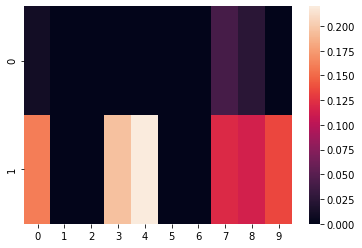

actual data:
(2, 10)


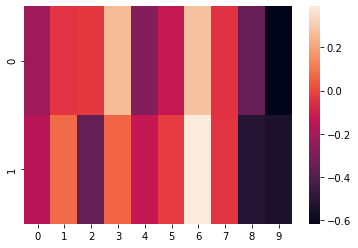

In [42]:
import tensorflow as tf
import numpy as np
import math

from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
from matplotlib import pyplot as plt

xs = np.load('transformed_voxels.npy')
ys = np.load('transformed_distmats.npy')
xs_train = xs[:18]
ys_train = ys[:18]
xs_test = xs[18:]
ys_test = ys[18:]
print(xs_train.shape)
print(xs_test.shape)

model = tf.keras.Sequential()

#network parameters
depth = 5
thinnest = int(input_size/2)

#calculating size of each layer
input_size = output_size = xs.shape[1]
odd_depth = depth%2
thinnest_depth = math.ceil((depth-2)/2)
reduce_by = (input_size - thinnest)/thinnest_depth
neuron_amount = []

neurons = input_size
for i in range(math.floor(depth/2)):
    neuron_amount.append(round(neurons))
    neurons -= reduce_by

neurons += reduce_by    
if(odd_depth):
    neuron_amount.append(thinnest)
    
for i in range(math.floor(depth/2)):
    neuron_amount.append(round(neurons))
    neurons += reduce_by
    
print(neuron_amount)

#building hourglass net
model.add(tf.keras.Input(shape=(input_size)))
for neuron in neuron_amount:
    model.add(tf.keras.layers.Dense(neuron, activation='relu'))

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(xs_train, ys_train, epochs=50)

test = model.predict(xs_test)

print('model prediction:')
print(test.shape)
sns.heatmap(test)
plt.show()
print('actual data:')
print(ys_test.shape)
sns.heatmap(ys_test)
plt.show()